In [3]:
%load_ext autoreload
%autoreload 2
% matplotlib inline

In [4]:
import pandas as pd
pd.set_option('max_columns', 50)
import seaborn as sns
sns.set(color_codes=True)
import altair as alt
alt.enable_mime_rendering()

In [45]:
from lac.plot import plot_with_roads
from lac.get import get_crimes, get_repairs, get_roads
from lac.transform import repairs_to_circles, create_repairs_with_crimes, is_day

In [6]:
crimes = get_crimes()
repairs = get_repairs()
roads = get_roads()

data/crimes_2016.geojson exists; skipping download
data/crimes_2014.geojson exists; skipping download
data/crimes_2015.geojson exists; skipping download
data/crimes_2013.geojson exists; skipping download
reading data/crimes_2015.geojson into geopandas
reading data/crimes_2013.geojson into geopandas
data/crimes_2018.geojson exists; skipping download
reading data/crimes_2014.geojson into geopandas
reading data/crimes_2016.geojson into geopandas
data/crimes_2017.geojson exists; skipping download
data/crimes_2012.geojson exists; skipping download
data/crimes_2011.geojson exists; skipping download
reading data/crimes_2018.geojson into geopandas
reading data/crimes_2017.geojson into geopandas
reading data/crimes_2012.geojson into geopandas
reading data/crimes_2011.geojson into geopandas
data/crimes_2010.geojson exists; skipping download
reading data/crimes_2010.geojson into geopandas


In [7]:
repairs_circles = repairs_to_circles(repairs, within_m=100)

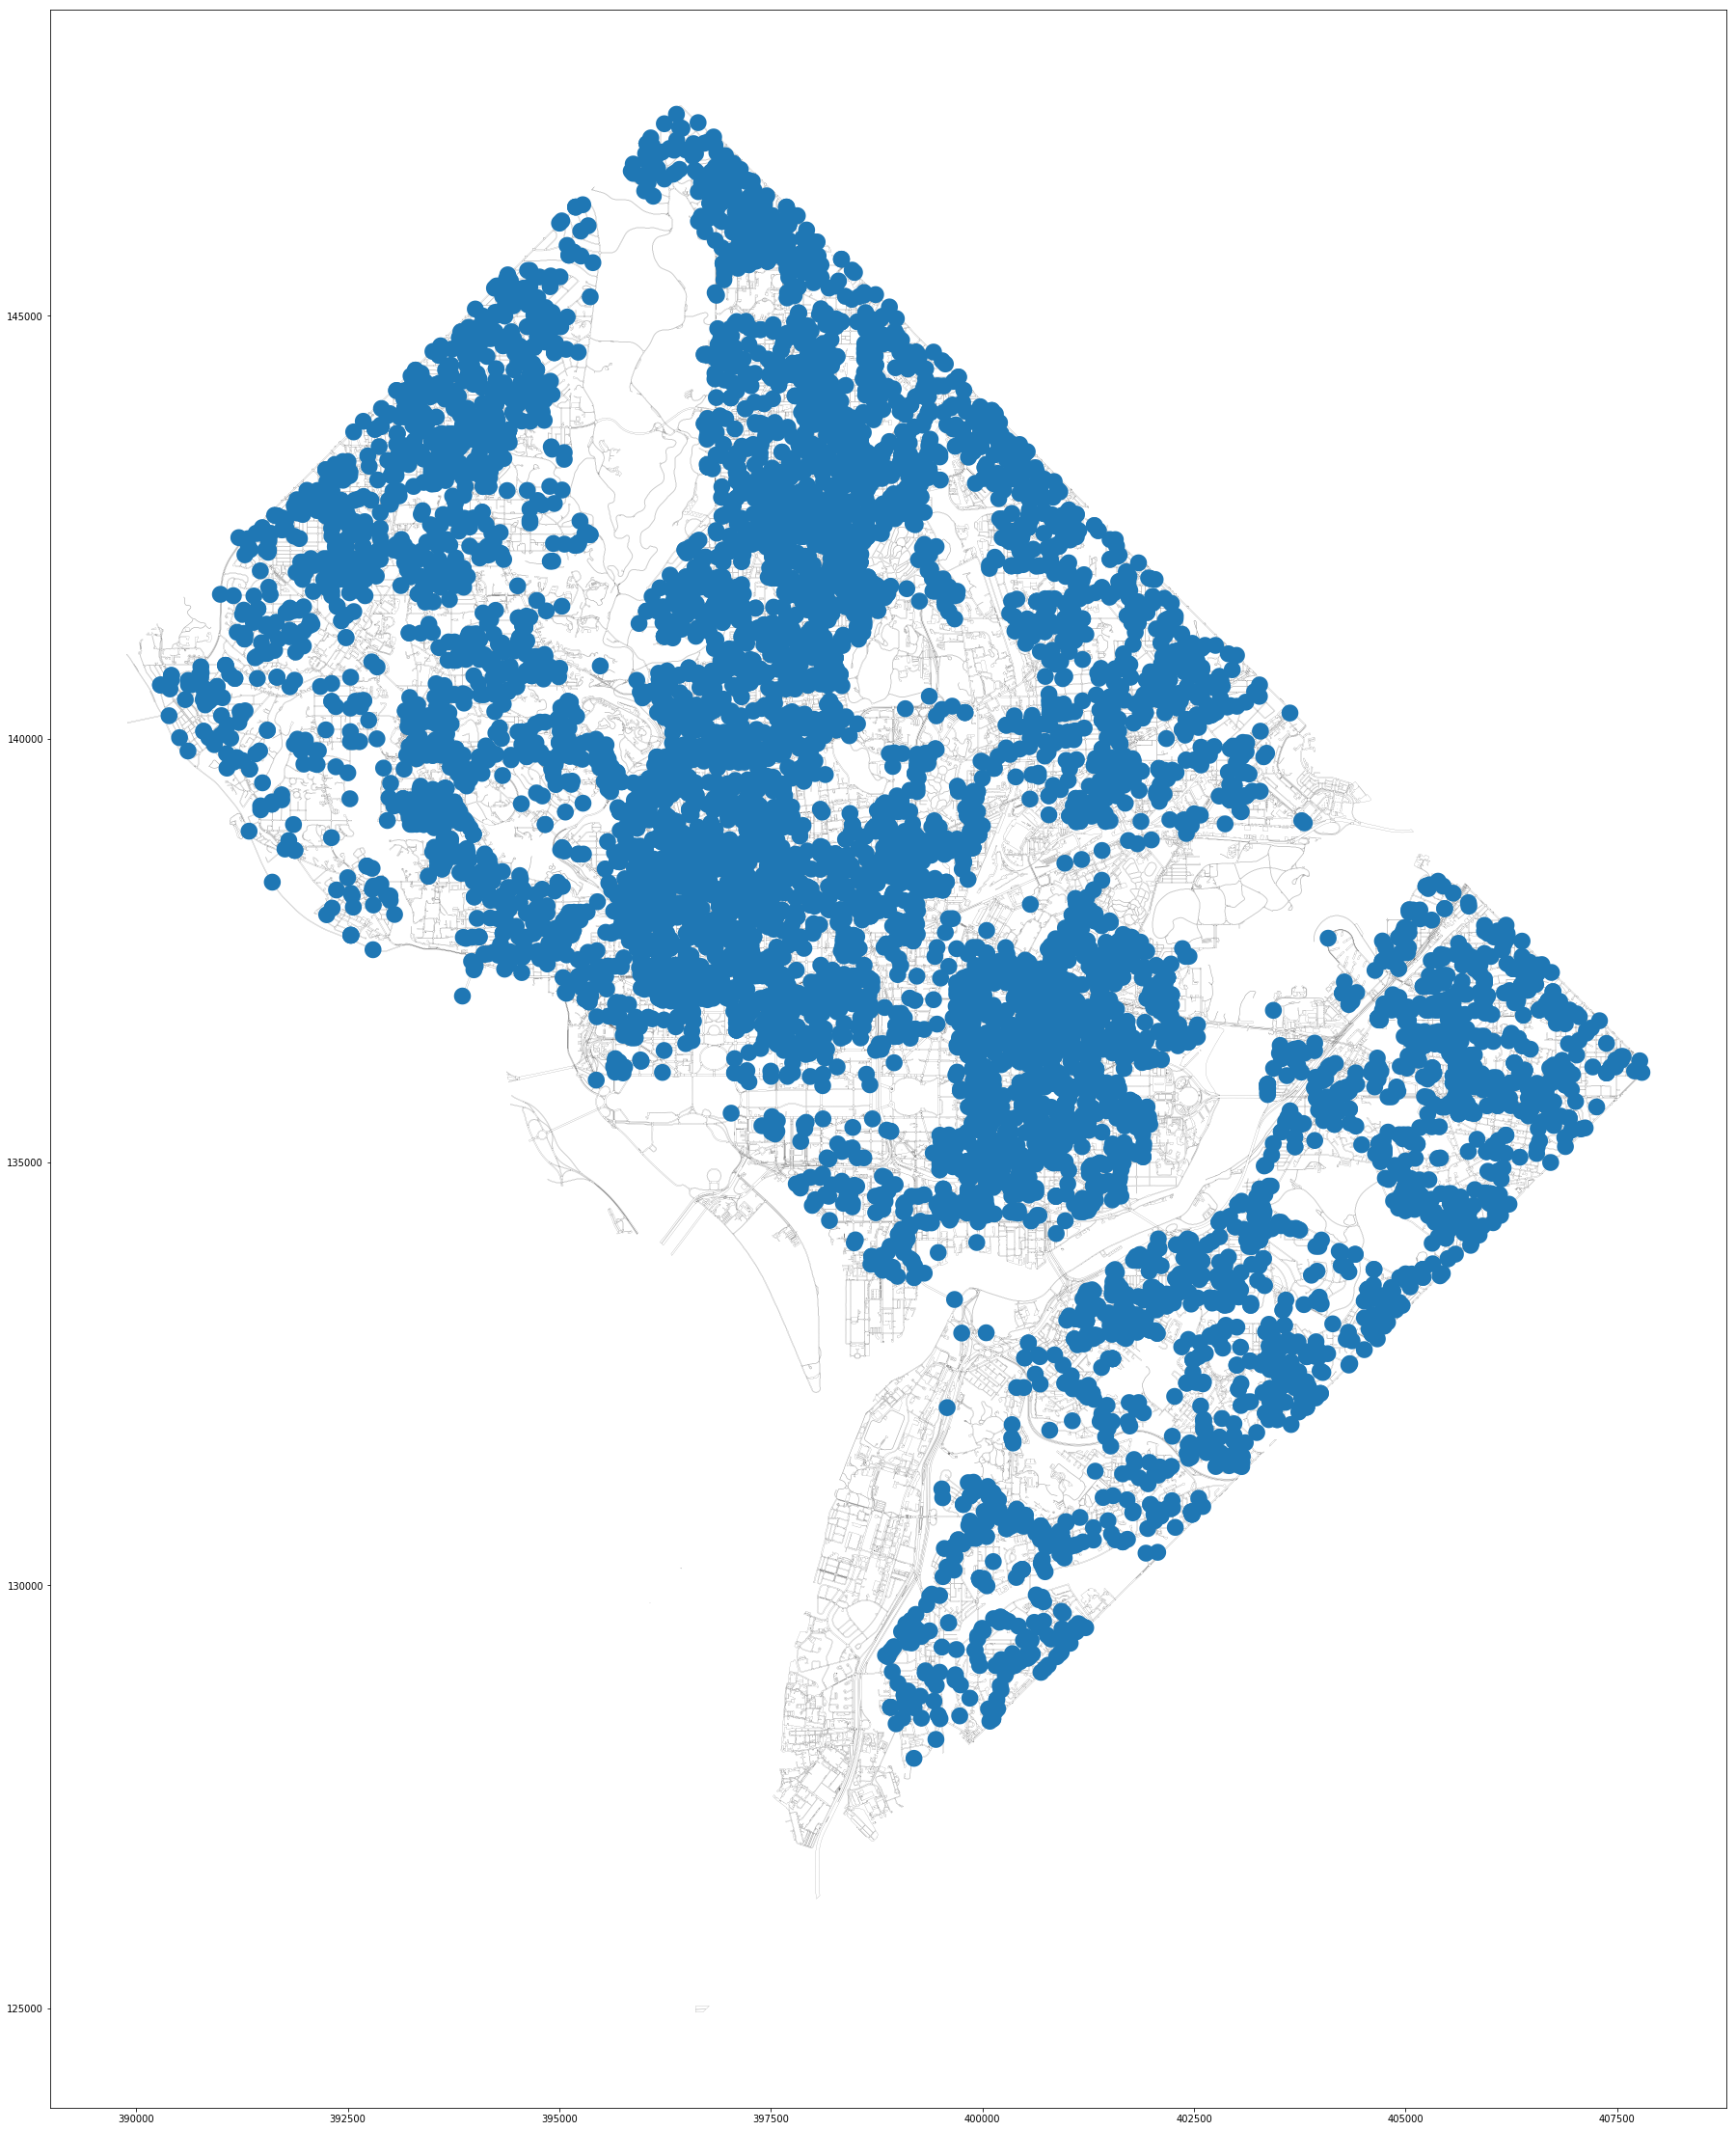

In [11]:
plot_with_roads(roads, repairs_circles)

In [48]:
repairs_with_crimes = create_repairs_with_crimes(repairs_circles, crimes)

the `rel_days` is the time number of days between the streetlight being repaired and the crime that happened near it

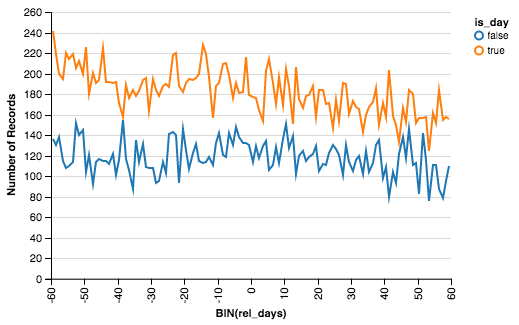

In [64]:
c = alt.Chart(repairs_with_crimes[repairs_with_crimes.rel_days.between(-60, 60)][['rel_days', 'is_day']])
c.max_rows = len(repairs_with_crimes)
c.mark_line().encode(
    x=alt.X('rel_days:Q', bin=alt.Bin(step=1)),
    y='count(*):Q',
    color='is_day'
)